In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

In [2]:
mushrooms = 'C:/Users/Jonathan/Downloads/mushrooms.csv'
data = pd.read_csv(mushrooms)

In [3]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
class                       8124 non-null object
cap-shape                   8124 non-null object
cap-surface                 8124 non-null object
cap-color                   8124 non-null object
bruises                     8124 non-null object
odor                        8124 non-null object
gill-attachment             8124 non-null object
gill-spacing                8124 non-null object
gill-size                   8124 non-null object
gill-color                  8124 non-null object
stalk-shape                 8124 non-null object
stalk-root                  8124 non-null object
stalk-surface-above-ring    8124 non-null object
stalk-surface-below-ring    8124 non-null object
stalk-color-above-ring      8124 non-null object
stalk-color-below-ring      8124 non-null object
veil-type                   8124 non-null object
veil-color                  8124 non-null object
ring-number

In [5]:
data['stalk-root'].value_counts()

b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64

In [6]:
100*len(data.loc[data['stalk-root']=='?']) / sum(data['stalk-root'].value_counts())

30.52683407188577

In [7]:
data = data.drop('stalk-root', 1)

In [8]:
data['class'].value_counts()

e    4208
p    3916
Name: class, dtype: int64

In [9]:
Y = pd.get_dummies(data.iloc[:,0],  drop_first=False)
X = pd.DataFrame()
for each in data.iloc[:,1:].columns:
    dummies = pd.get_dummies(data[each], prefix=each, drop_first=False)
    X = pd.concat([X, dummies], axis=1)

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [11]:

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

models = []

models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(probability=True)))
models.append(('RF', RandomForestClassifier()))

In [12]:
from sklearn.model_selection import cross_val_score, KFold

seed = 321

# evaluating each model in turn
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, X_train, y_train.iloc[:,1], cv=kfold, scoring='roc_auc')    
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

NB: 0.997965 (0.002335)
SVM: 0.999938 (0.000086)
RF: 1.000000 (0.000000)


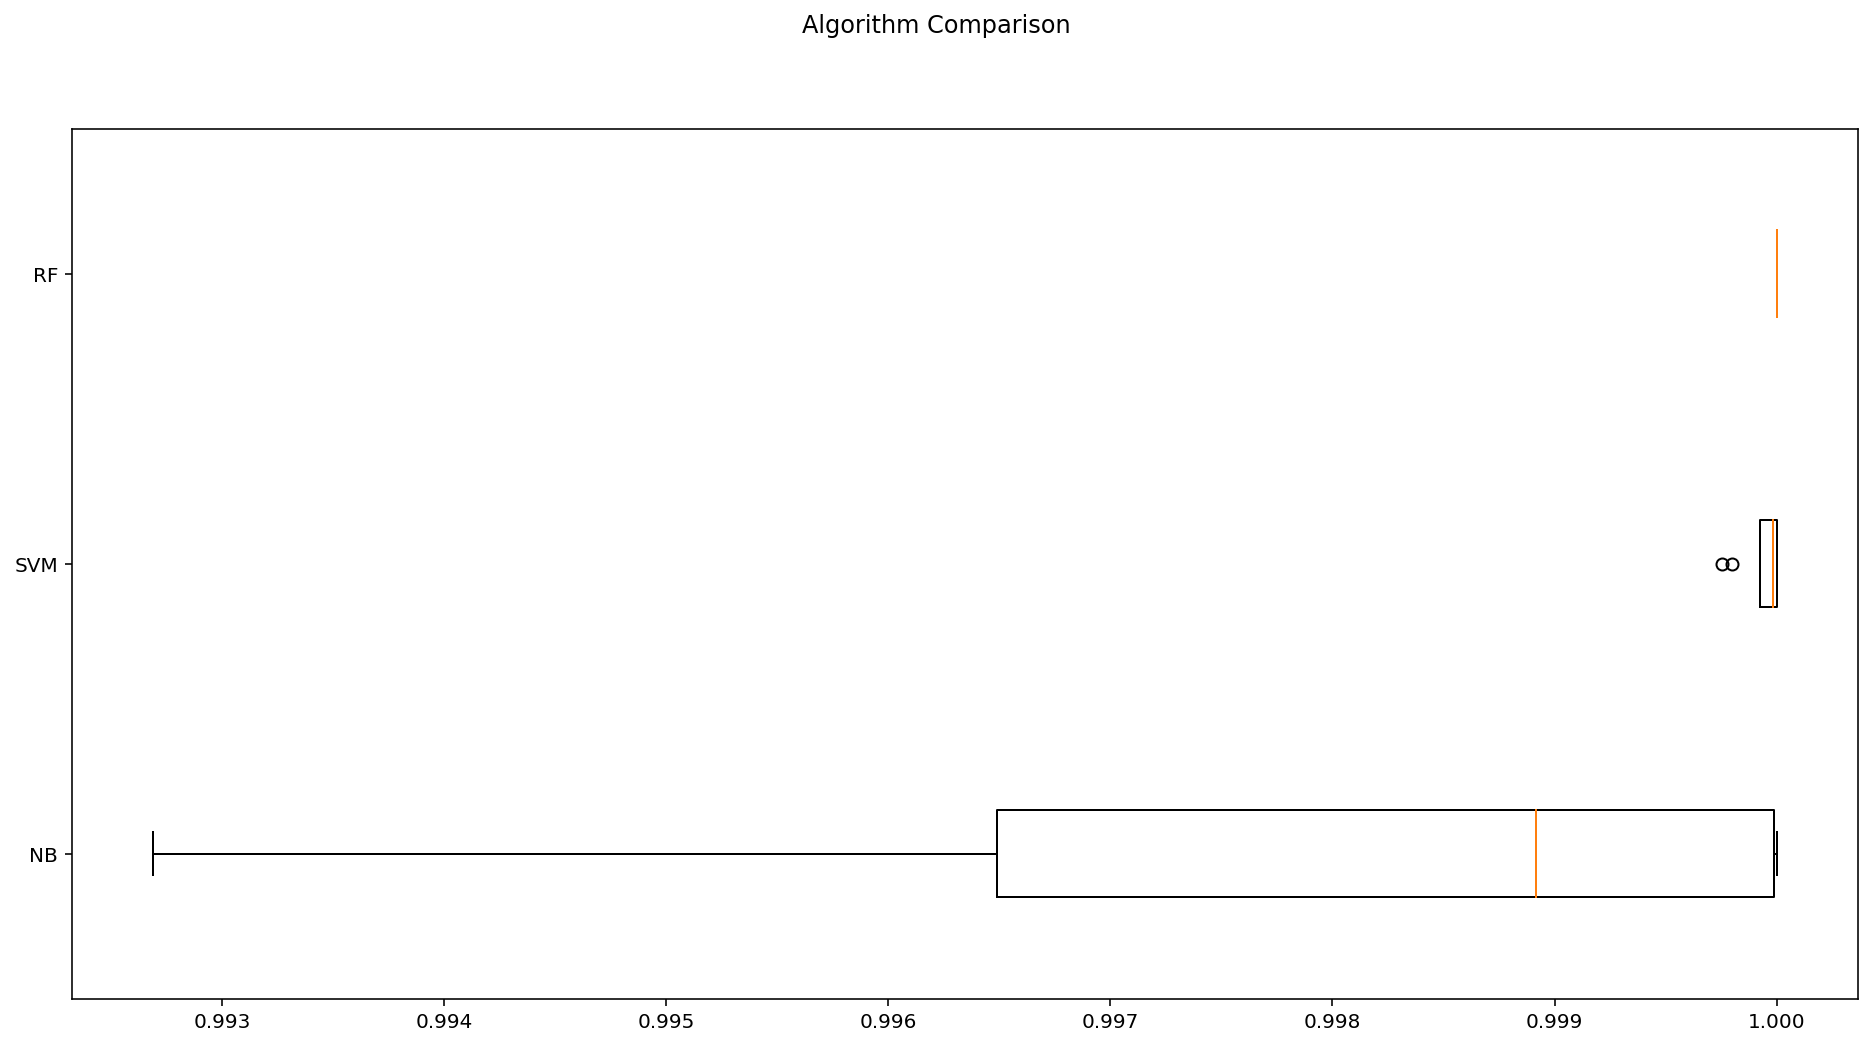

In [13]:
# Compare Algorithms
fig = plt.figure(figsize=(16, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results, vert=False)
ax.set_yticklabels(names)
plt.show()

In [14]:
from collections import defaultdict
from sklearn.metrics import roc_auc_score

model_predictions = defaultdict()
model_score = defaultdict(np.float)
for name, model in models:
    model.fit(X_train, y_train.iloc[:,1])
    my_pred = model.predict(X_test)
    model_predictions[name] = my_pred
    model_score[name] = roc_auc_score(y_test.iloc[:,1], my_pred)

    msg = "%s: %f" % (name, model_score[name])
    print(msg) 

NB: 0.989437
SVM: 1.000000
RF: 1.000000


In [15]:
model_predicions_df = pd.DataFrame(model_predictions)

In [16]:
corrmat = model_predicions_df.corr()
corrmat

,NB,SVM,RF
NB,1.000000,0.978058,0.978058
SVM,0.978058,1.000000,1.000000
RF,0.978058,1.000000,1.000000
